The best threshold for AAII is: -0.17
The final portfolio value using the best threshold is: $445680.71
The number of switches between Small Cap and Large Cap returns is: 80
The portfolio was invested in Small Cap returns for 701 periods (90.80% of the time).
The portfolio was invested in Large Cap returns for 71 periods (9.20% of the time).
Cumulative return attributed to Small Cap: 8.33
Cumulative return attributed to Large Cap: -0.52
Percentage contribution to total return - Small Cap: 100.64%
Percentage contribution to total return - Large Cap: -0.64%
Switch points between Small Cap and Large Cap returns: Index([  2,  60,  62,  63,  64, 122, 125, 129, 130, 170, 171, 195, 196, 198,
       201, 204, 210, 214, 217, 220, 221, 228, 229, 230, 234, 241, 243, 244,
       246, 251, 252, 253, 255, 257, 258, 259, 263, 264, 268, 282, 283, 284,
       286, 301, 302, 330, 331, 335, 337, 343, 344, 384, 385, 392, 393, 399,
       400, 432, 434, 436, 437, 442, 443, 459, 460, 480, 482, 600, 601, 624

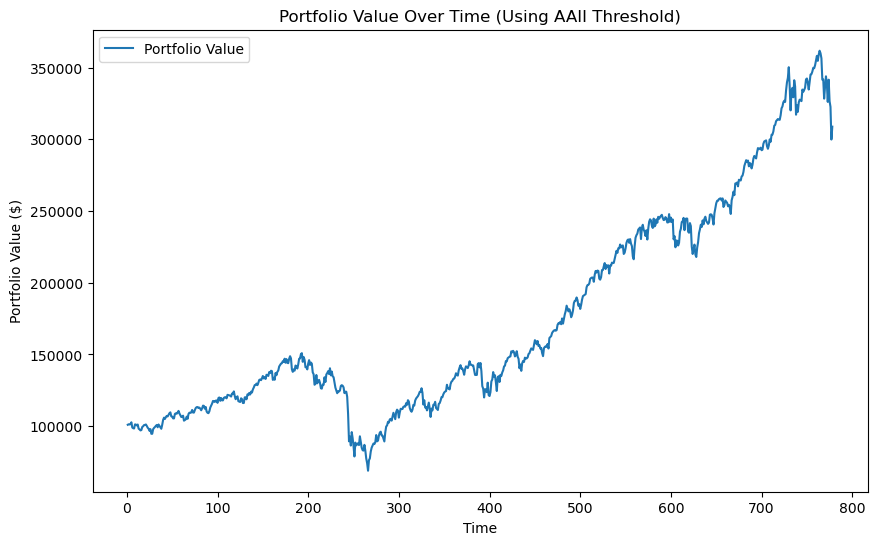

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define the initial portfolio value
initial_investment = 100000  # $100,000

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Define a wider range of thresholds to test
thresholds = np.linspace(data['AAII'].min(), data['AAII'].max(), 500)

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's AAII value
    data['Trade Signal'] = data['AAII'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for AAII is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[best_trade_signals == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[best_trade_signals == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[best_trade_signals.diff().abs() == 1]
small_cap_holding_periods = data.index[best_trade_signals == 1]
large_cap_holding_periods = data.index[best_trade_signals == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for AAII is: 0.12
The final portfolio value using the best threshold is: $392038.77
The number of switches between Small Cap and Large Cap returns is: 166
The portfolio was invested in Small Cap returns for 241 periods (31.22% of the time).
The portfolio was invested in Large Cap returns for 531 periods (68.78% of the time).
Cumulative return attributed to Small Cap: 0.60
Cumulative return attributed to Large Cap: 1.45
Percentage contribution to total return - Small Cap: 15.79%
Percentage contribution to total return - Large Cap: 84.21%
Switch points between Small Cap and Large Cap returns: Index([  3,   5,   6,   7,  10,  15,  20,  26,  31,  36,
       ...
       747, 749, 751, 753, 755, 756, 762, 764, 767, 768],
      dtype='int64', length=166)
Holding periods for Small Cap returns: Index([  3,   4,   6,  10,  11,  12,  13,  14,  20,  21,
       ...
       736, 738, 747, 748, 751, 752, 755, 762, 763, 767],
      dtype='int64', length=241)
Holding periods for Large 

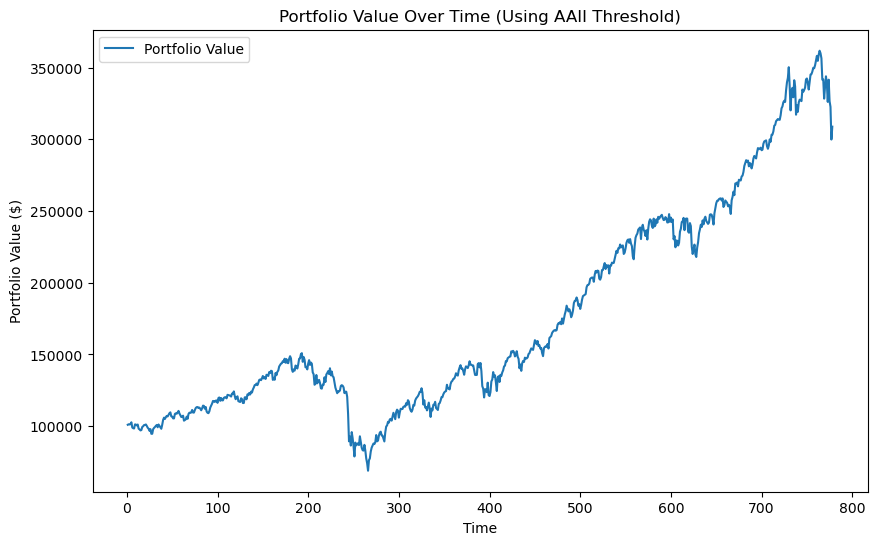

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define the initial portfolio value
initial_investment = 100000  # $100,000

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Define a wider range of thresholds to test
thresholds = np.linspace(data['AAII'].min(), data['AAII'].max(), 500)

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the AAII value from two periods ago
    data['Trade Signal'] = data['AAII'].shift(2).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for AAII is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[best_trade_signals == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[best_trade_signals == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[best_trade_signals.diff().abs() == 1]
small_cap_holding_periods = data.index[best_trade_signals == 1]
large_cap_holding_periods = data.index[best_trade_signals == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for AAII is: -0.05
The final portfolio value using the best threshold is: $384371.08
The number of switches between Small Cap and Large Cap returns is: 188
The portfolio was invested in Small Cap returns for 553 periods (71.63% of the time).
The portfolio was invested in Large Cap returns for 219 periods (28.37% of the time).
Cumulative return attributed to Small Cap: 2.42
Cumulative return attributed to Large Cap: 0.12
Percentage contribution to total return - Small Cap: 98.04%
Percentage contribution to total return - Large Cap: 1.96%
Switch points between Small Cap and Large Cap returns: Index([  4,  10,  11,  17,  18,  52,  53,  54,  55,  62,
       ...
       744, 754, 756, 769, 770, 771, 772, 775, 777, 778],
      dtype='int64', length=188)
Holding periods for Small Cap returns: Index([  4,   5,   6,   7,   8,   9,  11,  12,  13,  14,
       ...
       764, 765, 766, 767, 768, 770, 772, 773, 774, 777],
      dtype='int64', length=553)
Holding periods for Large 

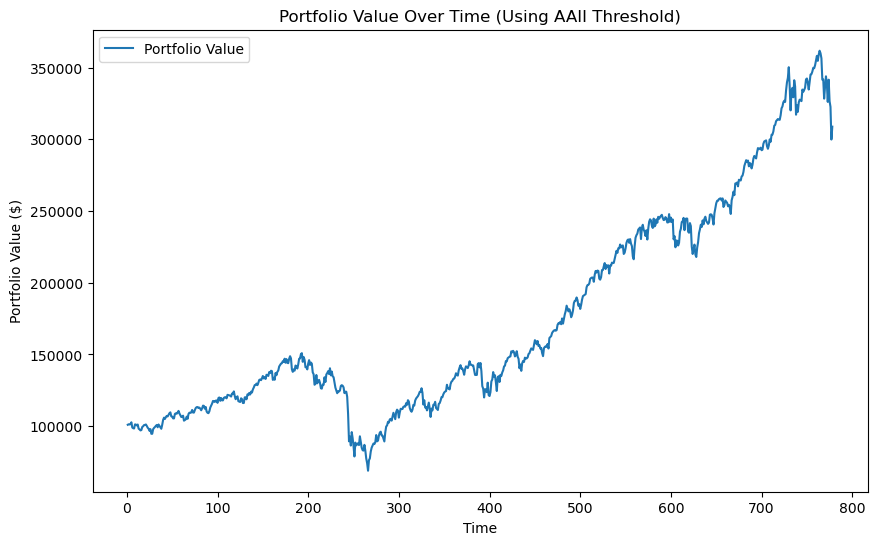

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define the initial portfolio value
initial_investment = 100000  # $100,000

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Define a wider range of thresholds to test
thresholds = np.linspace(data['AAII'].min(), data['AAII'].max(), 500)

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the AAII value from three periods ago
    data['Trade Signal'] = data['AAII'].shift(3).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for AAII is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[best_trade_signals == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[best_trade_signals == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[best_trade_signals.diff().abs() == 1]
small_cap_holding_periods = data.index[best_trade_signals == 1]
large_cap_holding_periods = data.index[best_trade_signals == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for AAII is: 0.03
The final portfolio value using the best threshold is: $372783.14
The number of switches between Small Cap and Large Cap returns is: 217
The portfolio was invested in Small Cap returns for 419 periods (54.27% of the time).
The portfolio was invested in Large Cap returns for 353 periods (45.73% of the time).
Cumulative return attributed to Small Cap: 2.16
Cumulative return attributed to Large Cap: 0.18
Percentage contribution to total return - Small Cap: 93.42%
Percentage contribution to total return - Large Cap: 6.58%
Switch points between Small Cap and Large Cap returns: Index([  5,  11,  12,  18,  21,  29,  33,  38,  39,  53,
       ...
       755, 757, 760, 761, 766, 768, 770, 774, 775, 778],
      dtype='int64', length=217)
Holding periods for Small Cap returns: Index([  5,   6,   7,   8,   9,  10,  12,  13,  14,  15,
       ...
       759, 761, 762, 763, 764, 765, 768, 769, 774, 778],
      dtype='int64', length=419)
Holding periods for Large C

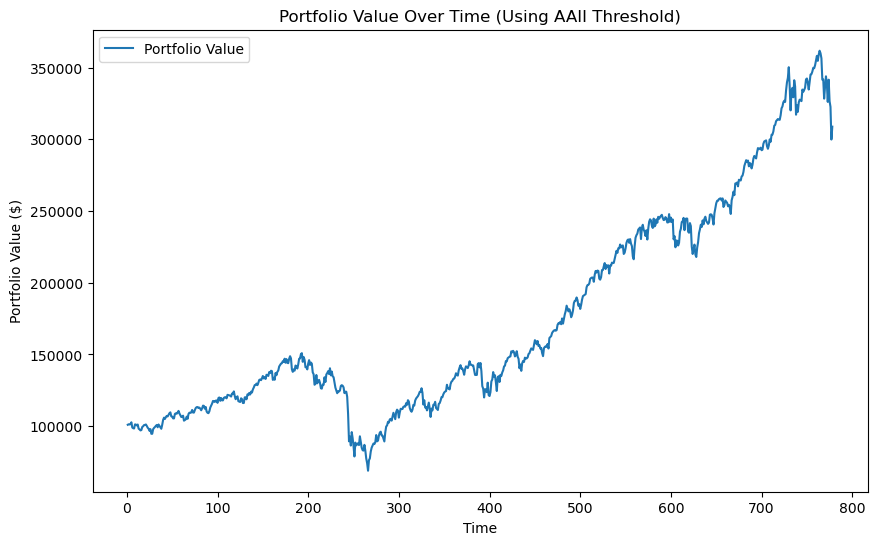

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define the initial portfolio value
initial_investment = 100000  # $100,000

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Define a wider range of thresholds to test
thresholds = np.linspace(data['AAII'].min(), data['AAII'].max(), 500)

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the AAII value from three periods ago
    data['Trade Signal'] = data['AAII'].shift(4).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for AAII is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[best_trade_signals == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[best_trade_signals == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[best_trade_signals.diff().abs() == 1]
small_cap_holding_periods = data.index[best_trade_signals == 1]
large_cap_holding_periods = data.index[best_trade_signals == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


C:\Users\LukaDelic\anaconda3\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\LukaDelic\anaconda3\Lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


The best threshold for AAII Change is: nan
The final portfolio value using the best threshold is: $308768.31
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 772 periods (100.00% of the time).
Cumulative return attributed to Small Cap: 0.00
Cumulative return attributed to Large Cap: 2.09
Percentage contribution to total return - Small Cap: 0.00%
Percentage contribution to total return - Large Cap: 100.00%
Switch points between Small Cap and Large Cap returns: Index([], dtype='int64')
Holding periods for Small Cap returns: Index([], dtype='int64')
Holding periods for Large Cap returns: Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       769, 770, 771, 772, 773, 774, 775, 776, 777, 778],
      dtype='int64', length=772)


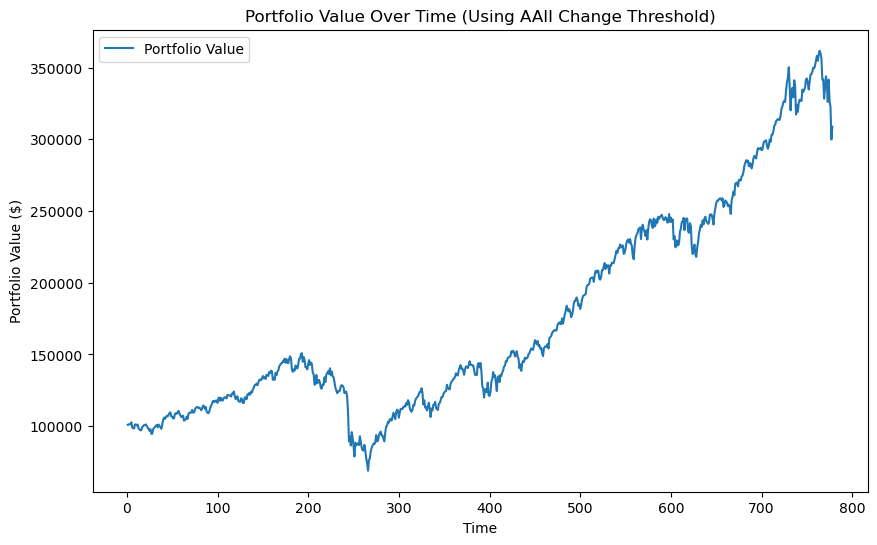

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Calculate the percentage change in AAII
data['AAII Change'] = data['AAII'].pct_change() * 100

# Define the initial portfolio value
initial_investment = 100000  # $100,000

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Define a range of thresholds to test
thresholds = np.linspace(data['AAII Change'].min(), data['AAII Change'].max(), 500)

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's percentage change in AAII
    data['Trade Signal'] = data['AAII Change'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for AAII Change is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[best_trade_signals == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[best_trade_signals == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[best_trade_signals.diff().abs() == 1]
small_cap_holding_periods = data.index[best_trade_signals == 1]
large_cap_holding_periods = data.index[best_trade_signals == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Change Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


Missing values before processing:
 Date                287
AAII                287
Small Cap Return    291
Large Cap Return    291
dtype: int64
Missing values after forward filling:
 Date                287
AAII                  0
Small Cap Return      1
Large Cap Return      1
dtype: int64


C:\Users\LukaDelic\anaconda3\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\LukaDelic\anaconda3\Lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


The best threshold for AAII Change is: nan
The final portfolio value using the best threshold is: $1384610242.96
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 1061 periods (100.00% of the time).
Cumulative return attributed to Small Cap: 0.00
Cumulative return attributed to Large Cap: 13845.10
Percentage contribution to total return - Small Cap: 0.00%
Percentage contribution to total return - Large Cap: 100.00%
Switch points between Small Cap and Large Cap returns: Index([], dtype='int64')
Holding periods for Small Cap returns: Index([], dtype='int64')
Holding periods for Large Cap returns: Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065],
      dtype='int64', length=1061)


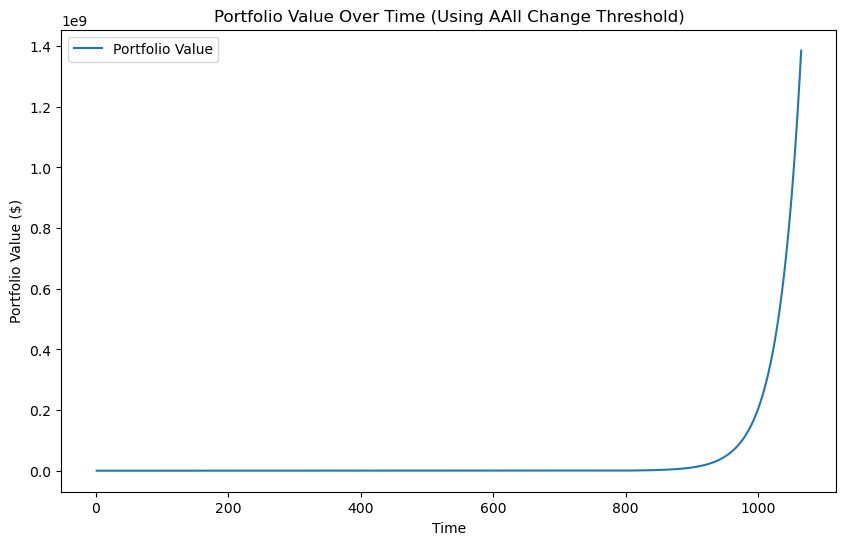

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")

# Check for NaNs in the data
print("Missing values before processing:\n", data.isnull().sum())

# Forward fill any NaNs in the necessary columns
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Check for any remaining NaNs
print("Missing values after forward filling:\n", data.isnull().sum())

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Calculate the percentage change in AAII
data['AAII Change'] = data['AAII'].pct_change() * 100

# Drop any rows with NaNs that result from the pct_change calculation
data.dropna(subset=['AAII Change'], inplace=True)

# Define the initial portfolio value
initial_investment = 100000  # $100,000

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Define a range of thresholds to test
thresholds = np.linspace(data['AAII Change'].min(), data['AAII Change'].max(), 500)

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's percentage change in AAII
    data['Trade Signal'] = data['AAII Change'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for AAII Change is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[best_trade_signals == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[best_trade_signals == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[best_trade_signals.diff().abs() == 1]
small_cap_holding_periods = data.index[best_trade_signals == 1]
large_cap_holding_periods = data.index[best_trade_signals == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Change Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The final portfolio value using the AAII contrarian strategy is: $250733.37
The number of switches between Small Cap and Large Cap returns is: 71
The portfolio was invested in Small Cap returns for 405 periods (52.46% of the time).
The portfolio was invested in Large Cap returns for 366 periods (47.41% of the time).
Cumulative return attributed to Small Cap: 0.23
Cumulative return attributed to Large Cap: 1.04
Percentage contribution to total return - Small Cap: 19.76%
Percentage contribution to total return - Large Cap: 80.24%
Switch points between Small Cap and Large Cap returns: Index([  8,   9,  15,  19,  52,  53,  60,  69,  81,  85,  87,  88,  89,  93,
       101, 102, 116, 119, 121, 135, 140, 142, 148, 153, 162, 165, 166, 168,
       170, 192, 195, 221, 226, 287, 291, 309, 314, 319, 330, 346, 372, 388,
       392, 404, 428, 447, 454, 464, 474, 486, 488, 492, 499, 502, 523, 525,
       533, 540, 549, 551, 593, 613, 620, 668, 684, 711, 741, 746, 752, 761,
       769],
      dtype='

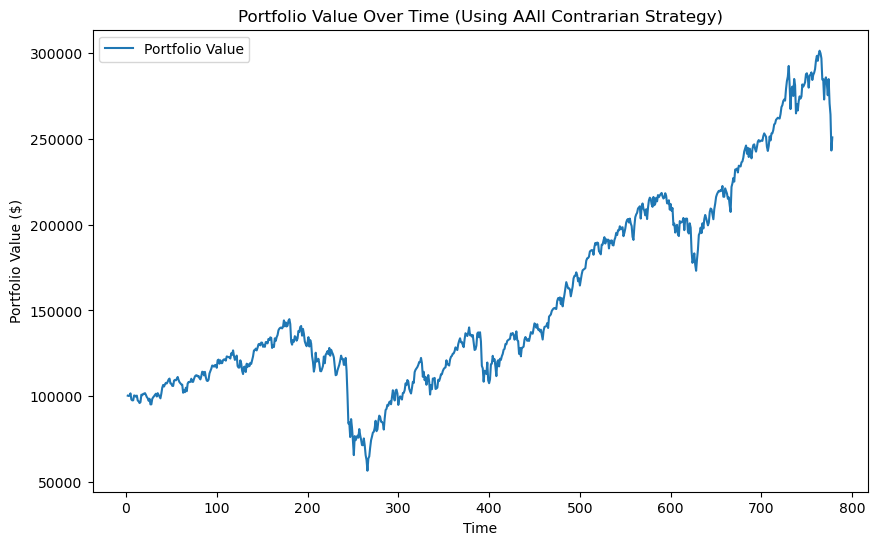

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define sentiment thresholds
low_threshold = data['AAII'].quantile(0.25)  # Lower quartile
high_threshold = data['AAII'].quantile(0.75) # Upper quartile

# Generate trade signals based on contrarian strategy
data['Trade Signal'] = data['AAII'].shift(1).apply(lambda x: 1 if x < low_threshold else 0 if x > high_threshold else np.nan)

# Forward fill the trade signals to ensure we have a signal for every period
data['Trade Signal'].ffill(inplace=True)

# Select returns based on the trade signal
data['Selected Return'] = data.apply(
    lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'] if row['Trade Signal'] == 0 else np.nan, axis=1)

# Forward fill the selected returns to ensure we have a return for every period
data['Selected Return'].ffill(inplace=True)

# Calculate the strategy returns
data['Strategy Return'] = data['Selected Return']

# Calculate the portfolio value over time
initial_investment = 100000  # $100,000
data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()

# Get the final portfolio value
final_portfolio_value = data['Portfolio Value'].iloc[-1]

# Print the final portfolio value
print(f"The final portfolio value using the AAII contrarian strategy is: ${final_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (data['Trade Signal'].diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (data['Trade Signal'] == 1).sum()
num_large_cap = (data['Trade Signal'] == 0).sum()
total_periods = len(data['Trade Signal'])

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Calculate cumulative returns attributed to Small Cap and Large Cap
cumulative_small_cap_return = (data.loc[data['Trade Signal'] == 1, 'Small Cap Return'] + 1).prod() - 1
cumulative_large_cap_return = (data.loc[data['Trade Signal'] == 0, 'Large Cap Return'] + 1).prod() - 1

# Calculate the total portfolio return
total_return = final_portfolio_value / initial_investment - 1

# Calculate the weighted contributions
weighted_small_cap_return = (cumulative_small_cap_return * (num_small_cap / total_periods))
weighted_large_cap_return = (cumulative_large_cap_return * (num_large_cap / total_periods))

# Normalize contributions to add up to 100%
total_contributions = weighted_small_cap_return + weighted_large_cap_return
small_cap_contribution_percentage = (weighted_small_cap_return / total_contributions) * 100
large_cap_contribution_percentage = (weighted_large_cap_return / total_contributions) * 100

print(f"Cumulative return attributed to Small Cap: {cumulative_small_cap_return:.2f}")
print(f"Cumulative return attributed to Large Cap: {cumulative_large_cap_return:.2f}")
print(f"Percentage contribution to total return - Small Cap: {small_cap_contribution_percentage:.2f}%")
print(f"Percentage contribution to total return - Large Cap: {large_cap_contribution_percentage:.2f}%")

# Identify switch points and holding periods
switch_points = data.index[data['Trade Signal'].diff().abs() == 1]
small_cap_holding_periods = data.index[data['Trade Signal'] == 1]
large_cap_holding_periods = data.index[data['Trade Signal'] == 0]

print(f"Switch points between Small Cap and Large Cap returns: {switch_points}")
print(f"Holding periods for Small Cap returns: {small_cap_holding_periods}")
print(f"Holding periods for Large Cap returns: {large_cap_holding_periods}")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using AAII Contrarian Strategy)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the AAII data
data = pd.read_csv("AAII/AAII.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'AAII'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['AAII'] = data['AAII'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
low_thresholds = np.linspace(data['AAII'].quantile(0.10), data['AAII'].quantile(0.40), 10)
high_thresholds = np.linspace(data['AAII'].quantile(0.60), data['AAII'].quantile(0.90), 10)

# Initialize variables to store the best thresholds and corresponding portfolio value
best_low_threshold = None
best_high_threshold = None
best_portfolio_value = -np.inf

# Perform grid search to find the optimal thresholds
for low_threshold in low_thresholds:
    for high_threshold in high_thresholds:
        if low_threshold >= high_threshold:
            continue
        
        # Generate trade signals based on the contrarian strategy
        data['Trade Signal'] = data['AAII'].shift(1).apply(lambda x: 1 if x < low_threshold else 0 if x > high_threshold else np.nan)
        
        # Forward fill the trade signals to ensure we have a signal for every period
        data['Trade Signal'].ffill(inplace=True)
        
        # Select returns based on the trade signal
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'] if row['Trade Signal'] == 0 else np.nan, axis=1)
        
        # Forward fill the selected returns to ensure we have a return for every period
        data['Selected Return'].ffill(inplace=True)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
        
        # Get the final portfolio value
        final_portfolio_value = data['Portfolio Value'].iloc[-1]
        
        # Update the best thresholds and portfolio value if the current one is better
        if final_portfolio_value > best_portfolio_value:
            best_low_threshold = low_threshold
            best_high_threshold = high_threshold
            best_portfolio_value = final_portfolio_value

# Print the best thresholds and the corresponding portfolio value
print(f"The best low threshold for AAII is: {best_low_threshold:.2f}")
print(f"The best high threshold for AAII is: {best_high_threshold:.2f}")
print(f"The final portfolio value using the best thresholds is: ${best_portfolio_value:.2f}")


The best low threshold for AAII is: -0.10
The best high threshold for AAII is: 0.11
The final portfolio value using the best thresholds is: $297692.96
